In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist 
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# loading datset 

(x_train  , _) , (x_test , _) = mnist.load_data()

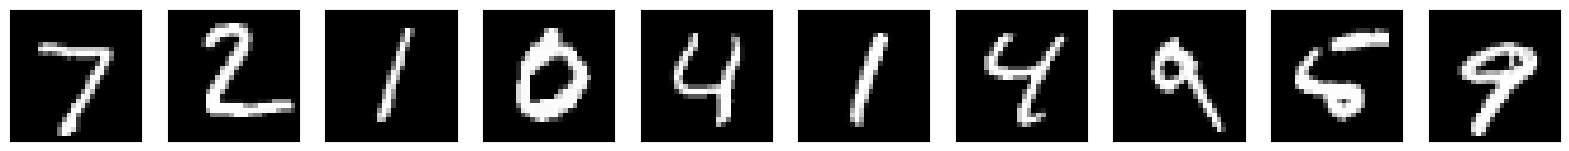

In [3]:
# display the dataset 

n = 10 
plt.figure(figsize=(20 , 4))
for i in range(n):
    ax = plt.subplot(1 , n , i+1)
    plt.imshow(x_test[i].reshape(28 , 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
plt.close()

In [4]:
# data scalling 

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((len(x_train) , 28*28*1))
x_test = x_test.reshape((len(x_test) , 28*28*1))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


# Auto Encoder using ANN

# Auto Encoder using CNN

In [5]:
from tensorflow.keras.layers import Input , Conv2D , Maxpooling2D , UpSampling , Flatten 
from tensorflow.keras.models import Model 

ImportError: cannot import name 'Maxpooling2D' from 'tensorflow.keras.layers' (C:\Users\Starzomee\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\api\_v2\keras\layers\__init__.py)

# Architecture of Auto Encoder 

In [2]:
input_layer_cnv = Input(shape = (28 , 28 , 1))
# 1.................

ae_cnv_en = Conv2D(32 , (3,3) , activation = 'relu' , padding = "same" , kernel_intializer = "he_normal")(input_layer_cnv)
ae_cnv_en = Maxpooling2D((2,2) , padding = "same")(ae_cnv_en) 

# 2...........

ae_cnv_en = Conv2D(32 , (3,3) , activation = 'relu' , padding = "same")(ae_cnv_en)
ae_cnv_en = Maxpooling2D((2,2) , padding = "same")(ae_cnv_en) 

# 3.............

ae_cnv_en = Conv2D(4 , (3,3) , activation = 'relu' , padding = "same" )(ae_cnv_en)
ae_cnv_en = Maxpooling2D((2,2) , padding = "same")(ae_cnv_en)

# 4 .............

ae_cnv_en = Flatten(name = "bot")(ae_cnv_en) 

# 1..........

ae_cnv_de = Reshape((4,4,4) , input_shape = (64 , ) , name = "botnext0")(ae_cnv_en)
ae_cnv_de = Conv2D (4 , (3,3) , activation = 'relu' , padding = "same" , name = "botnext1")(ae_cnv_de)
ae_cnv_de = UpSampling2D((2,2) , name = "botnext2")(ae_cnv_de)

# 2.............

ae_cnv_de = Conv2D(32 , (3,3) , activation = 'relu' , padding = "same" , name = "botnext3")(ae_cnv_de)
ae_cnc_en = UpSampling2D((2,2) , name = "botnext4")(ae_cnv_de)


# 3 .............
ae_cnv_de = Conv2D(32 , (3,3) , activation = 'relu' , padding = "same " , name = "botnext5" )(ae_cnv_de)
ae_cnv_de = UpSampling2D((2,2) , name = "botnext6")(ae_cnv_de)


# 4 ..............

ae_cnv_de = Conv2D(1 , (3,3) , activation = "sigmoid" , padding = "same" , name = "botnext7")(ae_cnv_de)
Ae_Conv = Model(inputs = input_layer_cnv , outputs = ae_cnv_de)




Ae_Conv.compile(optimizer = tf.keras.optimizer.SGD(0.09 , CLipvalue = 2.5) , loss = 'binary_crossentropy' , metrics = ["accuracy"])
# Ae_Conv.compile(optimizer = tf.keras.optimizer.SGD(0.1 , CLipvalue = 2) , loss = 'binary_crossentropy' , metrics = ["accuracy"]         
                
Ae.Conv.summary()





NameError: name 'Input' is not defined